In [1]:
%matplotlib inline

# Introduction to `VPlants.AutoWIG` package 

We aim to present choices made in `VPlants.AutoWIG` package in order to propose clear and reusable python bindings for C++ libraries.
These choices are largely based on [Tamás Szelei's coding blog](http://szelei.me/code-generator/).
This is illustrated using a simple library called `libtest` which can be found in the `test` directory of package's root directory.

In [2]:
from path import path
libtestpath = path('../test/libtest')
includes = list((libtestpath/'src'/'cpp').walkfiles('classes.h'))
print 'Include files:', '\n               '.join(str(include) for include in includes)

Include files: ../test/libtest/src/cpp/classes.h


## The pipeline of `VPlants.AutoWIG` package 

### Building the abstract syntax tree from headers

In [3]:
from vplants.autowig.ast import AbstractSyntaxTree
ast = AbstractSyntaxTree(*includes)
ast

TRANSLATION_UNIT /tmp/tmp3T0Ehb (0)
  +--CLASS_DECL Polygon (1)
  |  +--CXX_ACCESS_SPEC_DECL  (2)
  |  +--CONSTRUCTOR Polygon (3)
  |  |  +--PARM_DECL _width (4)
  |  |  +--PARM_DECL _height (5)
  |  +--CONSTRUCTOR Polygon (6)
  |  |  +--PARM_DECL _polygon (7)
  |  |     +--TYPE_REF class Polygon (8)
  |  +--DESTRUCTOR ~Polygon (9)
  |  +--CXX_METHOD get_width (10)
  |  +--CXX_METHOD set_width (11)
  |  |  +--PARM_DECL _width (12)
  |  +--CXX_METHOD get_height (13)
  |  +--CXX_METHOD set_height (14)
  |  |  +--PARM_DECL _height (15)
  |  +--CXX_METHOD compute_area (16)
  |  +--CXX_METHOD copy (17)
  |  |  +--TYPE_REF class Polygon (18)
  |  +--CXX_ACCESS_SPEC_DECL  (19)
  |  +--FIELD_DECL width (20)
  |  +--FIELD_DECL height (21)
  +--CLASS_DECL Rectangle (22)
  |  +--CXX_BASE_SPECIFIER class Polygon (23)
  |  |  +--TYPE_REF class Polygon (24)
  |  +--CXX_ACCESS_SPEC_DECL  (25)
  |  +--CONSTRUCTOR Rectangle (26)
  |  |  +--PARM_DECL _width (27)
  |  |  +--PARM_DECL _height (28)
  |  +-

In [4]:
import re
re.sub('(.*)<(.*)>$', r'^\1<(.*)>$', '::Container< A *, B >')

'^::Container<(.*)>$'

### Building the abstract semantic graph from the abstract syntax tree

/usr/lib/pymodules/python2.7/pygraphviz/agraph.py:1281: RuntimeWarning: Warning: k is not a known color.

  warnings.warn("".join(errors),RuntimeWarning)


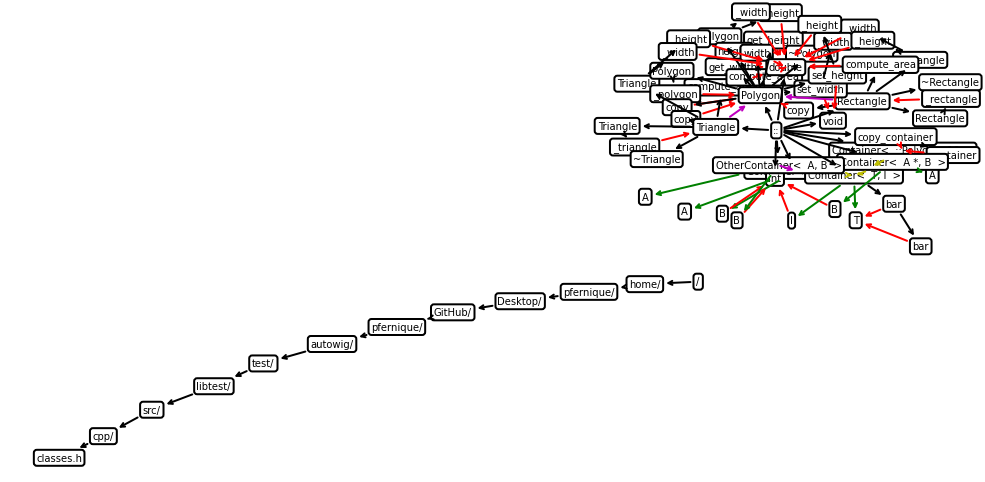

In [5]:
from vplants.autowig.asg import AbstractSemanticGraph
asg = AbstractSemanticGraph(ast)
asg

### Traverse the abstract semantic graph to generate Python bindings

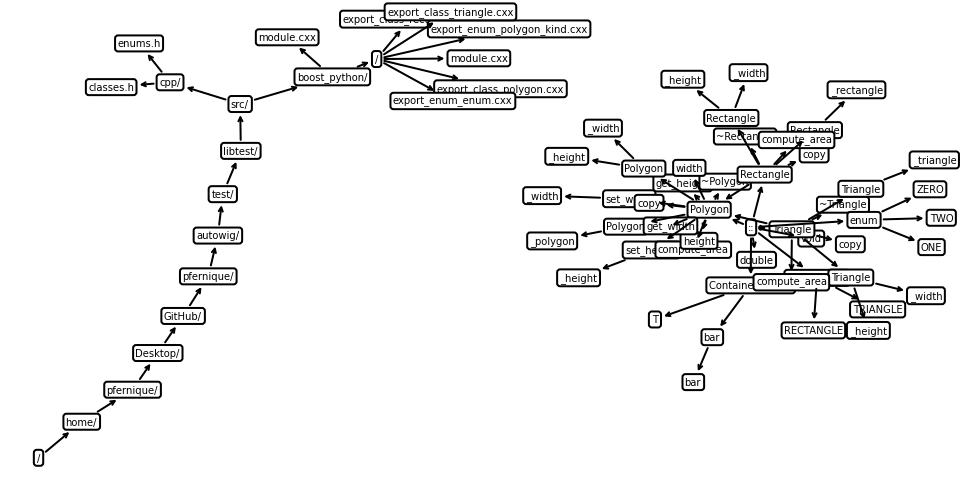

In [7]:
from vplants.autowig.boost_python import BoostPythonTraversal
traversal = BoostPythonTraversal(directory='/home/pfernique/Desktop/GitHub/pfernique/autowig/test/libtest/src/boost_python/')
traversal(asg)
asg

In [8]:
des = asg['(.*)Polygon$'][0]

In [9]:
import uuid
des.localname + '_' + str(uuid.uuid5(uuid.NAMESPACE_X500, des._node)).replace('-', '_')

'~Polygon_7f7072fa_4651_5e83_a5f8_8a655ed9d909'

In [10]:
asg['(.*)export_enum_polygon_kind.cxx']

[/home/pfernique/Desktop/GitHub/pfernique/autowig/test/libtest/src/boost_python//export_enum_polygon_kind.cxx]

In [11]:
asg['(.*)export_function_operate.cxx']

[]

In [12]:
export = asg['(.*)export_class_polygon_container.cxx']
export

[]

In [13]:
export.classes[0].methods(False)

AttributeError: 'list' object has no attribute 'classes'